#**Classificação de Adimplentes ou Inadimplentes**

---




# **1. Entendimento do Negócio** <a name="entendimento_negocio"></a>  

Este projeto aborda um problema de concessão de cartões de crédito, desenvolvido como parte da formação no curso **Profissão Cientista de Dados** da EBAC.  

### **Contexto**  
A gestão de risco de crédito é um processo crucial para diversas empresas, especialmente instituições financeiras que buscam minimizar prejuízos causados pela inadimplência. Por meio de técnicas preditivas, é possível estimar a probabilidade de um indivíduo que recebe crédito cumprir ou não com suas obrigações financeiras, permitindo decisões mais estratégicas e seguras.  

### **Objetivos do Projeto**  
O objetivo deste projeto é desenvolver um modelo preditivo capaz de identificar o risco de inadimplência, definido como a ocorrência de um atraso no pagamento superior a 90 dias dentro de um período de 12 meses. Para isso, o modelo utilizará variáveis disponíveis no momento da solicitação do cartão de crédito para classificar os indivíduos em dois grupos:  

- **Bons pagadores (default = 0)**: clientes com baixa probabilidade de inadimplência.  
- **Maus pagadores (default = 1)**: clientes com alto risco de inadimplência.  

Com essa abordagem, os bancos poderão tomar decisões mais informadas e criteriosas ao conceder crédito, reduzindo perdas financeiras e otimizando a carteira de clientes.  

### **Métricas de Avaliação**  
*(Aqui você pode incluir as métricas específicas utilizadas para medir o desempenho do modelo, como AUC-ROC, precisão, recall, F1-score, entre outras.)*  

[Voltar ao índice](#Contents)  

---


# **2. Coleta e Preparação dos Dados** <a name="coleta_preparacao"></a>

## Bibliotecas Utilizadas <a name="bibliotecas"></a>

<div style="text-align: right"
  
Aqui concentrarei todas as bibliotecas utilizadas durante o projeto

[Voltar ao índice](#Contents)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

%matplotlib inline

## Importação dos Dados <a name="importacao_dados"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CD_EBAC/PROJETO 1 EBAC/credito.csv')

# **3. Entendimento dos Dados**  <a name="entendimento_dados"></a>

<div style="text-align: justify"
  
Nesta fase, exploramos os dados para entender suas características, padrões e possíveis problemas. Utilizamos **análises distribuicao_numericas** e **bivariadas** para explorar as distribuições de variáveis individuais e as relações entre variáveis.

[Voltar ao índice](#Contents)

## Informações e visualização dos dados importados <a name="info"></a>

<div style="text-align: right"

Iniciaremos a exploração visualizando as 5 primeiras e 5 últimas entradas do DataFrame, obtendo assim uma visão geral de sua organização.

[Voltar ao índice](#Contents)

- Visualizando as 5 primeiras  entradas

In [ ]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


- Visualizando as 5 últimas entradas

In [ ]:
df.tail()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62
10126,714337233,1,43,F,2,mestrado,casado,menos que $40K,silver,25,6,4,2,"10.388,80","10.294,96",61


### Dicionário das variáveis <a name=dicionario></a>


<p align="justify">
Com as 5 primeiras entradas impressas na tela, pode-se ter então uma noção de como os dados estão estruturados, bem como quais são as variáveis mais importantes para o início da investigação. A seguir apresentaremos uma tabela contendo o significado de cada variável do DataFrame:</p>
  


| Variável                | Descrição                  | Tipo de Variável         |
|-------------------------|----------------------------------------------------------------|--------------------------|
| id | Identificação única do cliente |Numérico|
| default | Indica se o cliente entrou em inadimplência (1 = Sim, 0 = Não) | String(Binária)|
| idade | Idade do cliente | Int |
| sexo | Gênero do cliente (Masculino/Feminino) | String|
| dependentes | Número de dependentes do cliente | Int|
| escolaridade | Nível de escolaridade do cliente | String|
| estado_civil | Estado civil do cliente (Solteiro, Casado, etc.) | String|
| salario_anual | Faixa salarial anual do cliente | String |
| tipo_cartao | Tipo de cartão de crédito do cliente | String|
| meses_de_relacionamento | Quantidade de meses que o cliente mantém relacionamento | Int |
| qtd_produtos | Quantidade de produtos adquiridos pelo cliente | Int |
| iteracoes_12m | Número de interações do cliente nos últimos 12 meses | Int |
| meses_inativo_12m| Quantidade de meses inativo nos últimos 12 meses| Int |
| limite_credito| Limite de crédito disponível para o cliente| String |
| valor_transacoes_12m | Valor total das transações nos últimos 12 meses |String|
| qtd_transacoes_12m | Quantidade total de transações nos últimos 12 meses | Int|



[Voltar ao índice](#Contents)

# **4\. Exploração de Dados**


Vamos explorar dados de crédito presentes neste no DataFrame. Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é **adimplente (default = 0)**, ou **inadimplente (default = 1)**, ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira.

## Analisando a estrutura do Dataset <a name=estrutura></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

- Obtendo o **`número de linhas e colunas`** do DataFrame

In [ ]:
df.shape

(10127, 16)

- Obtendo **`nomes das colunas`** do DataFrame

In [ ]:
df.columns

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

- Exibindo um **`resumo das informações`** do DataFrame

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

<p align="justify">A análise inicial do conjunto de dados revelou a ausência de valores faltantes. O dataframe é constituído por 10.127 registros e 16 atributos, sendo 9 numéricos e 7 categóricos. Entretanto, uma inconsistência foi identificada: as variáveis <b>limite_credito e valor_transacoes_12m</b>, que representam valores quantitativos, foram erroneamente categorizadas. Para garantir a precisão das análises subsequentes, é fundamental realizar a conversão dessas variáveis para o tipo numérico.</p>

## **5. Limpeza e Transfrmação dos Dados** <a name=limpeza></a>

<p align= "justify">

A preparação dos dados para análise é fundamental para garantir a qualidade e a confiabilidade dos resultados. Nesta etapa, realizaremos as seguintes atividades:</p>



### **Limpeza:**

- **Indentificando e Tratando Valores Ausentes**
- **Identificando e Valores Duplicados**
- **Identificando e Tratando Outliers**


### **Transformação:**
- **Correção de Inconsistências:**
  - limite_credito          
  - valor_transacoes_12m


[Voltar ao índice](#Contents)

## *Dados Ausentes*

In [ ]:
# Verificando se existem missing values

df.isna().sum()

,0
id,0
default,0
idade,0
sexo,0
dependentes,0
escolaridade,0
estado_civil,0
salario_anual,0
tipo_cartao,0
meses_de_relacionamento,0


Como vimos anteriormente o dataset não possui valores ausentes.

### Identificando Valores Duplicados<a name=duplicados></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
# Identificando linhas duplicadas

duplicados = df.duplicated().sum()
print(f'O dataframe possui {duplicados} linhas duplicadas')

O dataframe possui 0 linhas duplicadas


O dataset não possui linhas duplicadas.

### Identificando e Tratando Outliers<a name=outilier></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
for nome_coluna in df.columns:
    fig = px.box(df, y=nome_coluna, title=f"Boxplot de {nome_coluna}")  # Criar boxplot com título
    fig.show()  # Exibir o gráfico individualmente

### *Transformando as variáveis*  **valor_transacoes_12m** e **limite_credito**###


<p align ='justify'> Conforme identificado anteriormente, as variáveis <b>valor_transacoes_12m</b> e <b>limite_credito</b>, que intuitivamente deveriam ser Ints, estão sendo interpretadas como categóricas (<b>dtype = object</b>). Essa discrepância pode comprometer a qualidade das análises. Para garantir resultados mais precisos e coerentes, é essencial converter essas variáveis para o tipo numérico adequado.</p>


In [ ]:
# Identificando o tipo das colunas 'valor_transacoes_12m' e 'limite_credito'

df[['valor_transacoes_12m', 'limite_credito']].dtypes

,0
valor_transacoes_12m,object
limite_credito,object


In [ ]:
# Funcao para converter cada linha da coluna
def funcao(valor):
  try:
    return float(valor.replace(".", "").replace(",", "."))
  except AttributeError:
    return float(valor) # If it's already a float, return it directly

#aplica para a coluna "limite_credito"
df['limite_credito'] = df['limite_credito'].apply(funcao)

#aplica para a coluna "valor_transacoes_12m"
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(funcao)

In [ ]:
# Verificando os tipos da colunas após a conversão das variáveis 'valor_transacoes_12m' e 'limite_credito'

df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


Após a transformação das variáveis `limite_credito` e `valor_transacoes_12m`nosso dataframe passa a ter  11 atributos numéricos e 5 categóricos.

## Análise Exploratória de Dados (EDA) <a name=EDA></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Análise Univariada <a name="univariada"></a>
<div style="text-align: right"

Com o objetivo de explorar os dados de forma individualizada, realizaremos uma análise de cada variável

Aqui, criaremos duas funções para facilitar a plotagem dos gráficos: uma utilizando `plot.bar` para variáveis categóricas e outra com `histplot` para variáveis numéricas.

- Função para Variáveis Categóricas

In [ ]:
def distribuicao_categorica(column):

  '''Essa função servirá para criar gráficos de barras das variáveis categóricas de forma automatizada, sem precisar repetir o código várias vezes.
  '''

  plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico

  # Criar o gráfico de barras com a paleta personalizada
  grafico_barras = df[column].value_counts().plot.bar()
  plt.title(f'Distribuição de {column}', fontsize=14)  # Título do gráfico
  plt.xlabel(column, fontsize=12)  # Rótulo do eixo X
  plt.ylabel('Contagem', fontsize=12)  # Rótulo do eixo Y
  plt.xticks(rotation=45)  # Gira os rótulos do eixo X para melhor leitura
  plt.tight_layout()  # Ajusta o layout para evitar sobreposição
  plt.show()  # Exibe o gráfico


- Função para Variáveis Numéricas

In [ ]:
def distribuicao_numerica(column):
  '''Essa função ajudará a visualizar distribuições de variáveis numéricas através do histplot'''

  plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
  sns.set_theme(style='darkgrid') # Define o tema escuro para os gráficos
  # Criar o gráfico de barras com a paleta personalizada
  sns.histplot(df, x = column, bins = 50)
  plt.title(f'Distribuição de {column}', fontsize=14)  # Título do gráfico
  plt.xlabel(column, fontsize=12)  # Rótulo do eixo X
  plt.ylabel('Contagem', fontsize=12)  # Rótulo do eixo Y
  plt.xticks(rotation=45)  # Gira os rótulos do eixo X para melhor leitura
  plt.tight_layout()  # Ajusta o layout para evitar sobreposição
  plt.show()  # Exibe o gráfico

##  Atributos **categóricos**

In [ ]:
# Criando um dataframe contendo as variáveis categóricas

df_cat = df.select_dtypes('object').describe().T
df_cat

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


- Distribuição da variável **`sexo`**

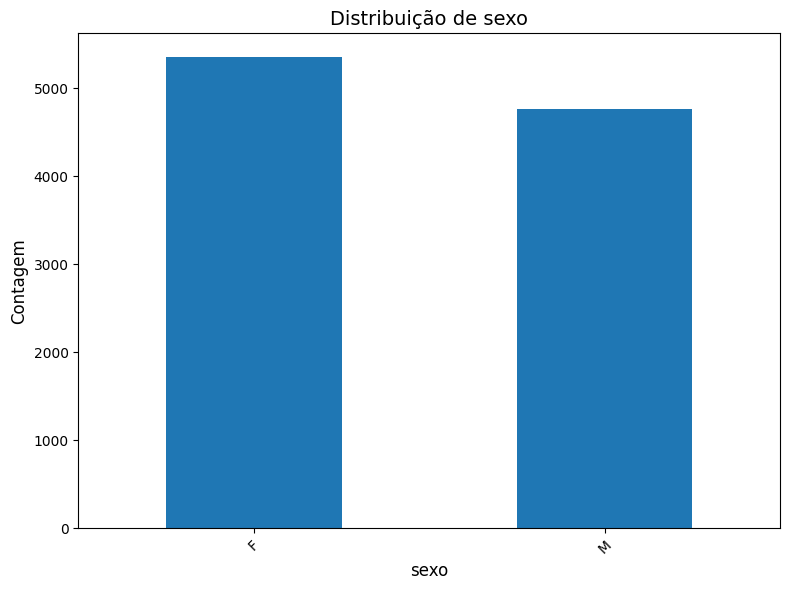

In [ ]:
distribuicao_categorica('sexo')

Após a analise da variável **`sexo`** observamos que   maioria dos registros  em nosso dataset pertence a **mulheres**.

- Distribuição da variável **`escolaridade`**

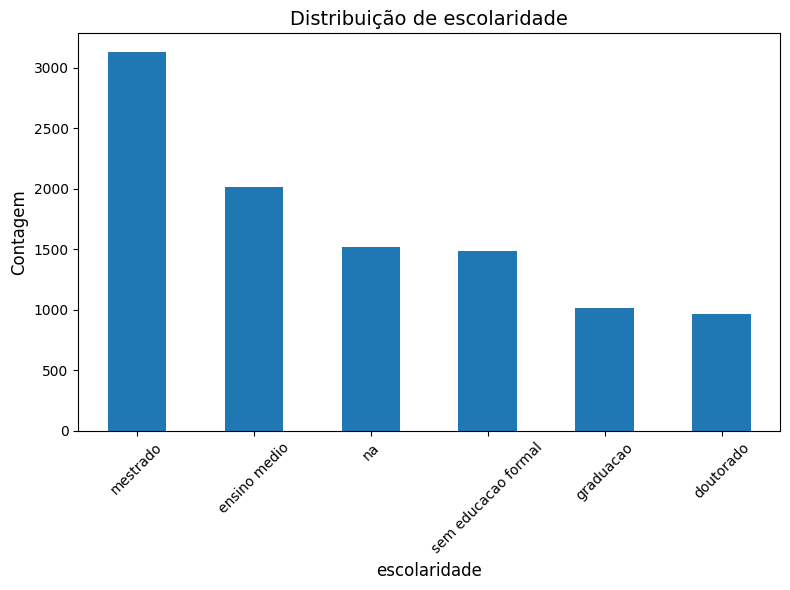

In [ ]:
distribuicao_categorica('escolaridade')

Após a analise da variável **`escolaridade`** observou que o nível de escolaridade mais frequente é <b>Mestrado</b>.

- Distribuição da variável **`salario_anual`**



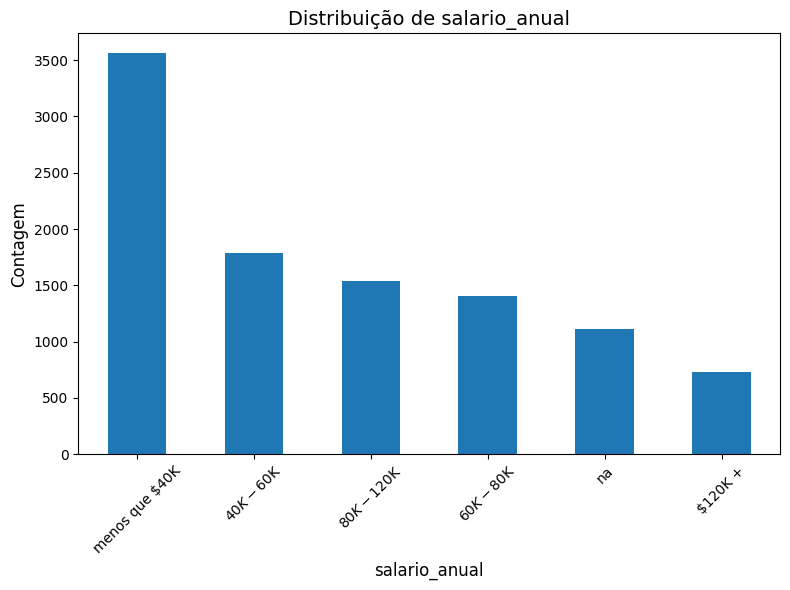

In [ ]:
distribuicao_categorica('salario_anual')

Após analisar a variável **`salario_anual`**, observamos que a faixa salarial com maior concentração é a dos indivíduos que ganham **menos de $40K anualmente**.

- Distribuição da variável **`estado_civil`**


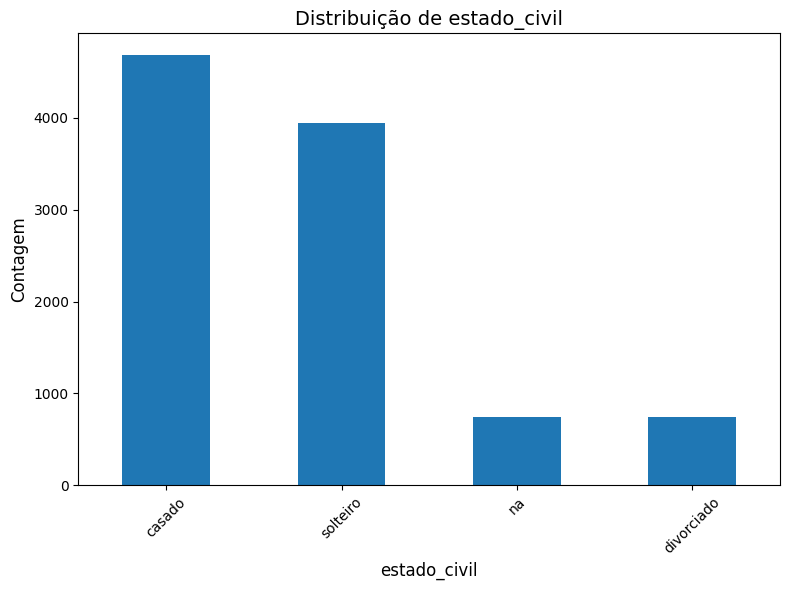

In [ ]:
distribuicao_categorica('estado_civil')

Após a analise da variável **`estado_civil`** observou que a amioria dos indivíduospresentes em nosso dataset são <b>casados</b>.

- Distribuição da variável **`tipo_cartao`**

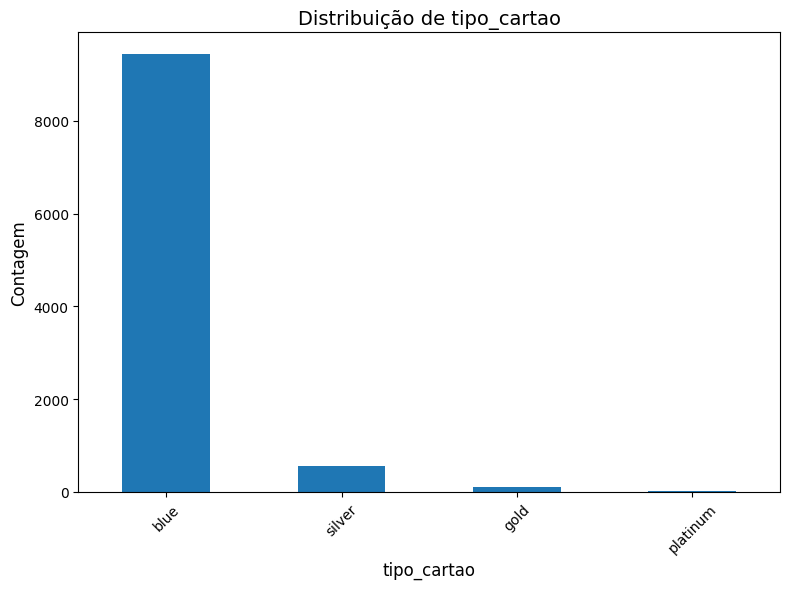

In [ ]:
distribuicao_categorica('tipo_cartao')

Após a analise da variável <b>`tipo_cartao`</b> observou que o tipo de cartão mais frequente é o <b>Blue</b>

## Atributos **numéricos**

In [ ]:
# Criando um dataframe contendo as variáveis numéricas

df.select_dtypes('number').describe().T


,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
default,10127.0,1.606596e-01,3.672348e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
idade,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
dependentes,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
limite_credito,10127.0,8.632440e+03,9.088788e+03,1.438000e+03,2.555355e+03,4.549420e+03,1.106817e+04,3.451699e+04
valor_transacoes_12m,10127.0,4.404583e+03,3.397128e+03,5.101600e+02,2.155825e+03,3.899590e+03,4.741310e+03,1.848493e+04


## Análise do Percentual de Clientes Adimplentes e Inadimplentes

In [ ]:
df[df['default'] == 0].shape


(8500, 16)

In [ ]:
df[df['default'] == 1].shape


(1627, 16)

In [ ]:
# Obtendo a Quantidade Total de Clientes

qtd_total = len(df)

# Quantidade de adimplentes
qtd_adimplentes = len(df[df['default'] == 0])

# Quantidade de inadimplentes
qtd_inadimplentes  = len(df[df['default'] == 1])

print(f'O número total de clientes da base de dados é de {qtd_total}.\n')
print(f'Desse total, {qtd_adimplentes} são adimplentes.\n')
print(f'Desse total, {qtd_inadimplentes} são inadimplentes.\n')

print(f"A proporcão de clientes adimplentes é de  {round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )

O número total de clientes da base de dados é de 10127.

Desse total, 8500 são adimplentes.

Desse total, 1627 são inadimplentes.

A proporcão de clientes adimplentes é de  83.93%
A proporcão de clientes inadimplentes é de 16.07%


- Distribuição da variável `default`

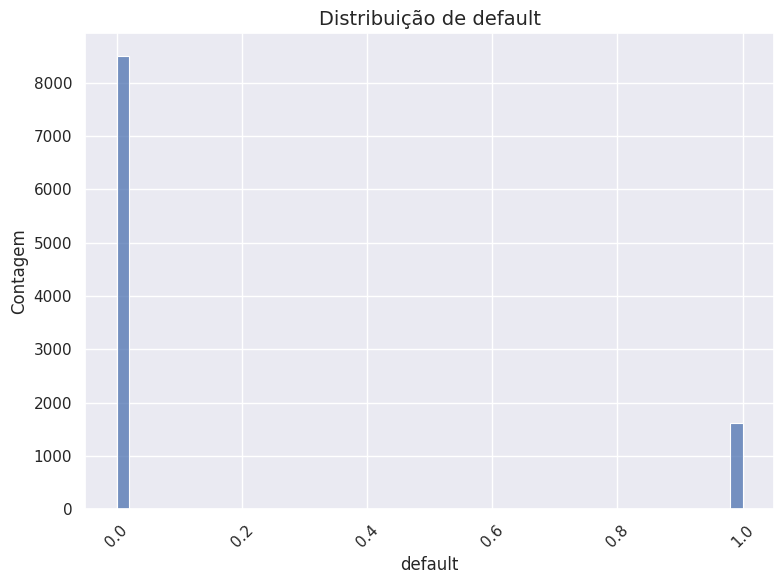

In [ ]:
distribuicao_numerica('default')

Após analisar a variável **`default`** (variável-alvo), observamos que cerca de **16% dos clientes** entraram em inadimplência. Isso sugere que a maioria dos clientes do dataset é adimplente, como podemos verificar no gráfico acima.

- Distribuição da variável **`iteracoes_12m`**

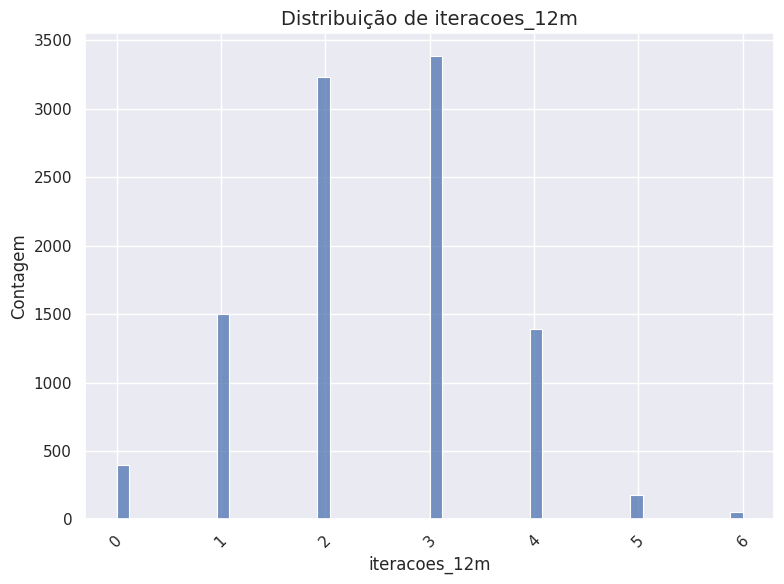

In [ ]:
distribuicao_numerica('iteracoes_12m')

Após analisar a variável **`'iteracoes_12m'`**, observamos que a maioria dos clientes obteviveram de **2 a 3 iterações** ao longo do período de 12 meses. Outro ponto que pode ser observado é a baixa ocorrência de zeros (poucos clientes apresentam zero iterações) podemos inferir  que a maioria interage ao menos uma vez.


- Distribuição da variável **`dependentes`**

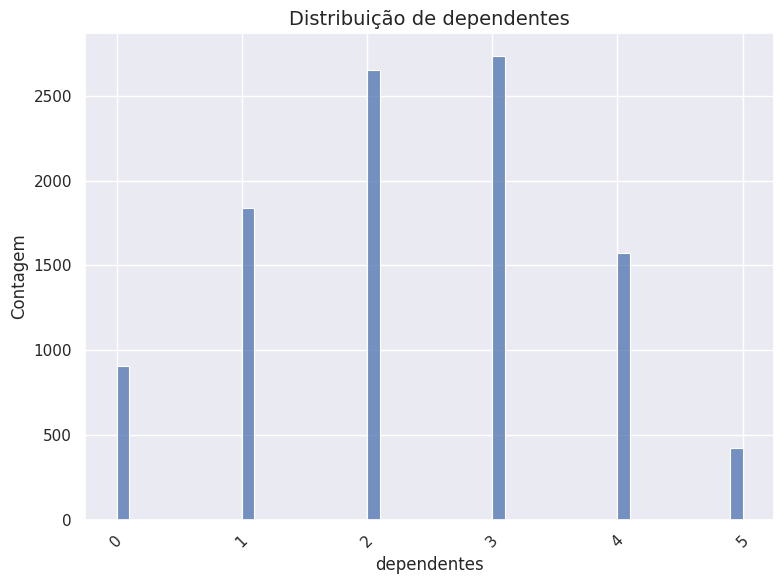

In [ ]:
distribuicao_numerica('dependentes')


Após analisar a variável **`dependentes`**, observamos que a média é de **2,35**, indicando que, em geral, os clientes possuem entre **2 e 3 dependentes**.

- Distribuição da variável **`qtd_produtos`**

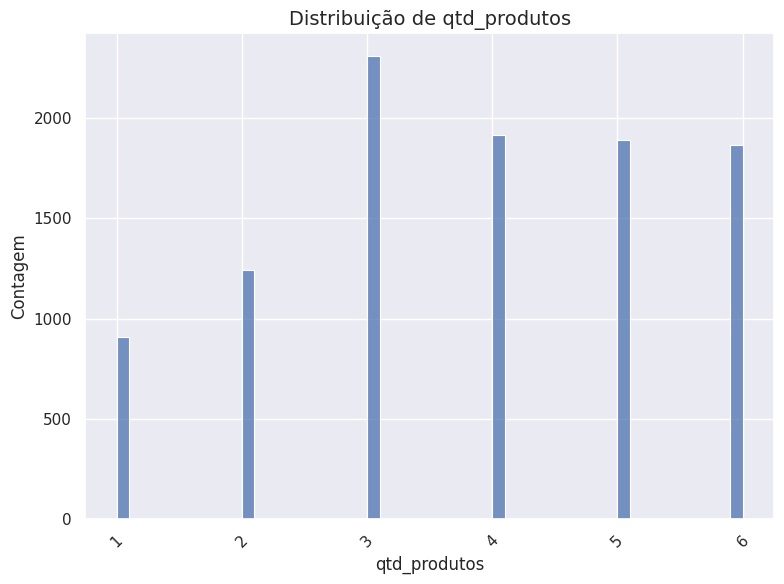

In [ ]:
distribuicao_numerica('qtd_produtos')

A análise da variável **`qtd_produtos`** revela que os clientes possuem, em média, **3,81 produtos financeiros**, o que indica que a maioria deles tem entre **3 e 4 produtos**.

- Distribuição da variável **`meses_inativo_12m`**

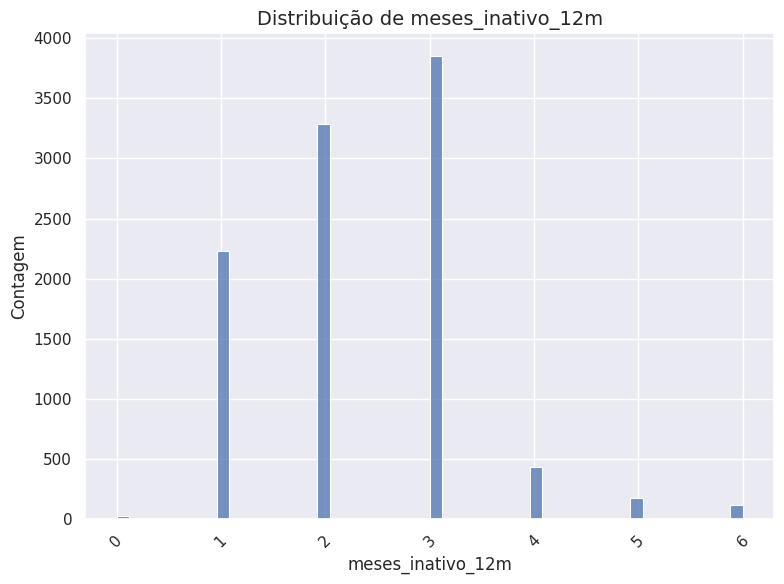

In [ ]:
distribuicao_numerica('meses_inativo_12m')

Após analisar a variável **`meses_inativo_12m`**, observamos que a maioria dos clientes permaneceu inativa por **2 a 3 meses** ao longo do período de 12 meses.

- Distribuição da variável `idade`

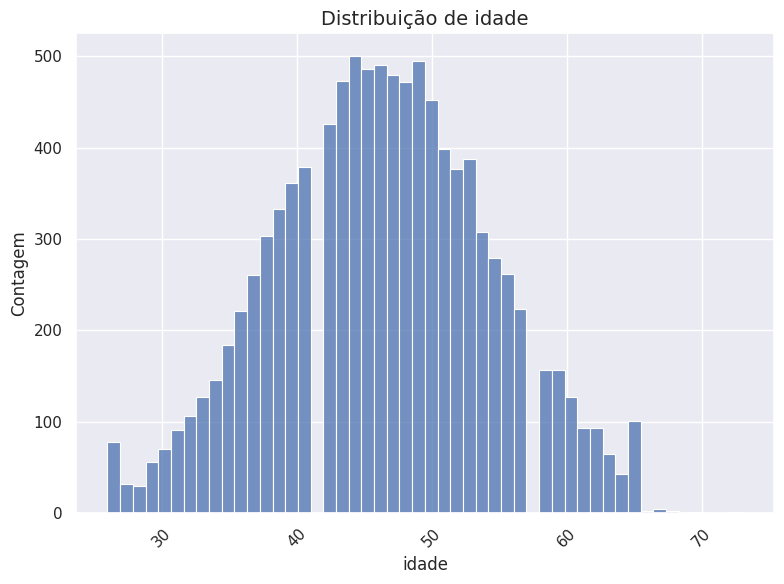

In [ ]:
distribuicao_numerica('idade')

Após a análise da variável **`idade`**, observou-se que a faixa etária dos clientes varia entre **26 e 73 anos**, com a maior concentração ocorrendo entre **40 e 50 anos**.

- Distribuição da variável **`meses_de_relacionamento`**

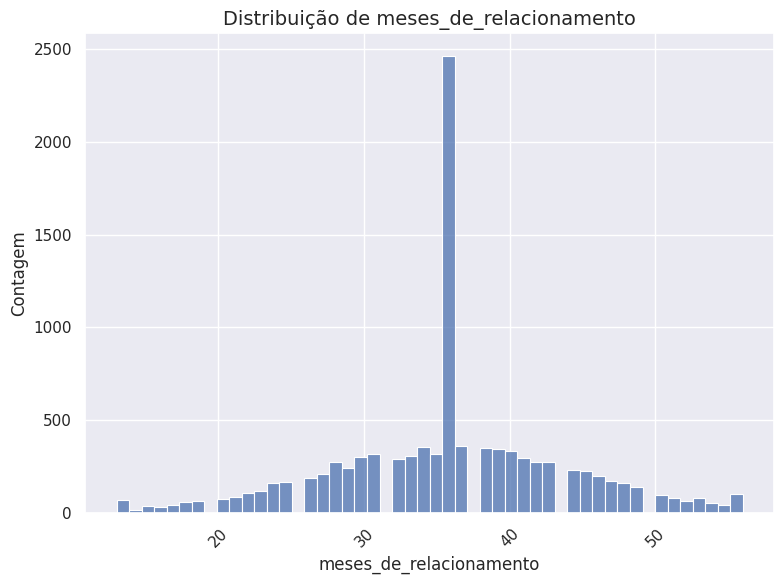

In [ ]:
distribuicao_numerica('meses_de_relacionamento')

Após analisar a variável **`meses_de_relacionamento`**, observamos que o tempo de relacionamento varia de **13 a 61 meses**. Percebe-se também uma maior concentração em **36 meses**, o que indica que a maioria dos clientes desta instituição financeira tem um relacionamento de 3 anos.

- Distribuição da variável **`limite_credito`**

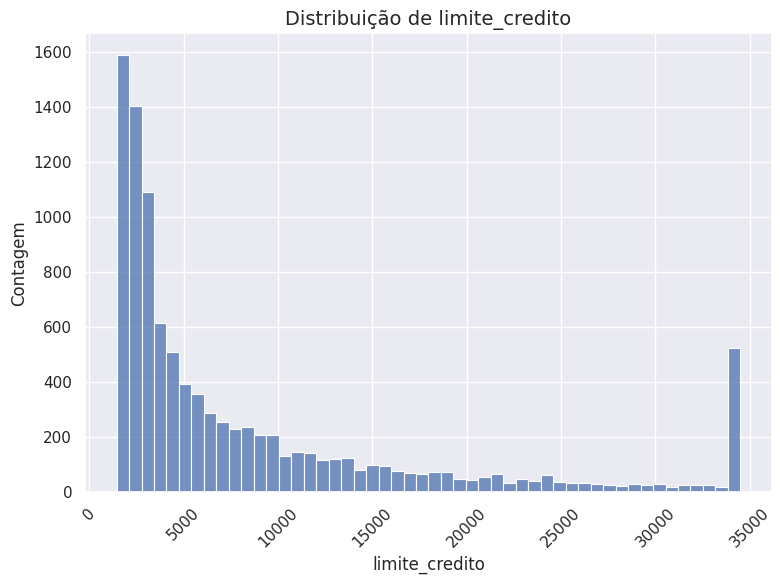

In [ ]:
distribuicao_numerica('limite_credito')

<p align = 'justify'> Após a analise da variável <b>limite_credito</b> observamos que <b>a maioria dos clientes possui limites de crédito mais baixos, concentrando-se entre 0 e 5.000</b>.
À medida que o limite aumenta, a frequência diminui progressivamente, indicando que poucos clientes possuem limites elevados. Há uma barra isolada em torno de 35.000, o que pode indicar um grupo específico de clientes com um limite de crédito significativamente maior que o restante. Esse comportamento pode ser causado por políticas diferenciadas para um grupo seleto de clientes ou por dados anômalos, o que deverá ser investigado.</p>

In [ ]:
(df['limite_credito'].describe())

,limite_credito
count,10127.000000
mean,8632.440165
std,9088.788041
min,1438.000000
25%,2555.355000
50%,4549.420000
75%,11068.175000
max,34516.990000


- Distribuição da variável `qtd_transacoes_12m`

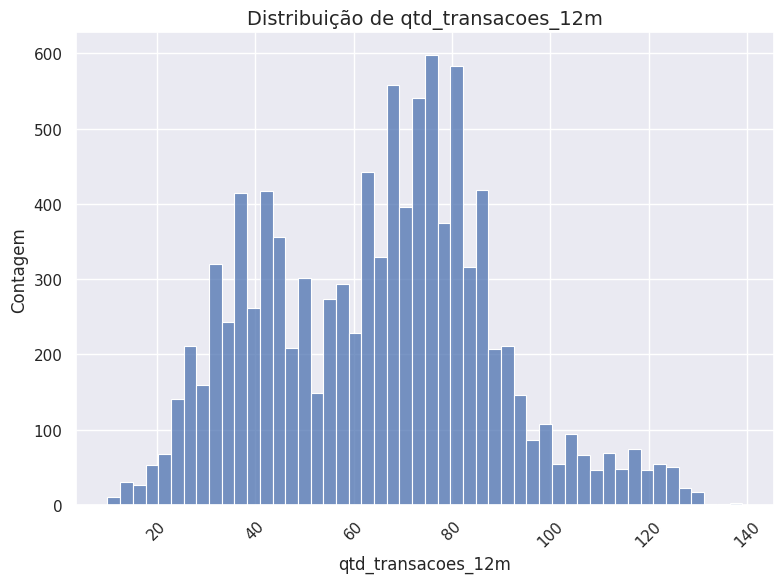

In [ ]:
distribuicao_numerica('qtd_transacoes_12m')

<p align ='justify'> Após analisar a variável <b>`qtd_transacoes_12m`</b>, observamos que o número de transações no último ano varia de <b>10 a 139</b>, com uma mediana de <b>67 transações</b>, o que significa que metade dos clientes realiza até esse número de operações anualmente. Além disso, há uma concentração significativa de pessoas que realizaram entre <b>80 e 90 transações</b>. Outro ponto a ressaltar é que o gráfico uma distribuição  assimétrica, com uma cauda mais longa à direita. Isso indica que há um número menor de pessoas que realizaram um número muito alto de transações, comparado àqueles que realizaram um número menor.</p>

- Distribuição da variável `'valor_transacoes_12m`

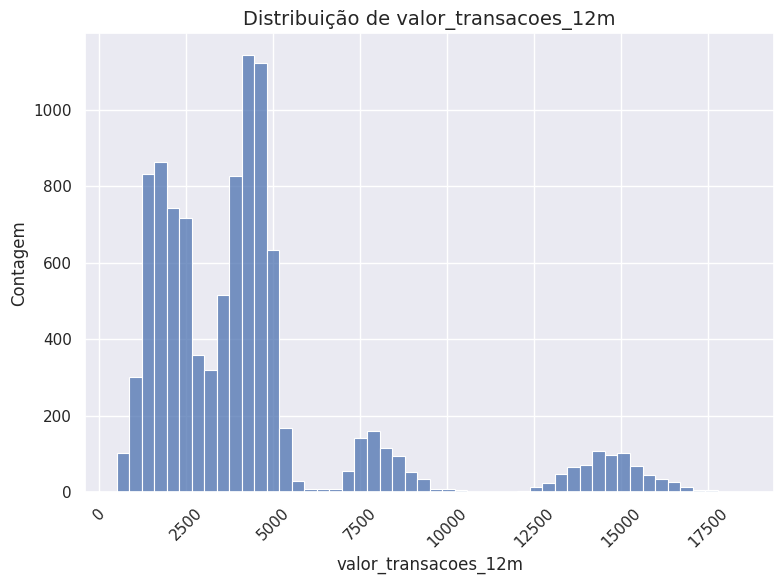

In [ ]:
distribuicao_numerica('valor_transacoes_12m')

<p align = 'justify'>A análise da variável <b>valor_transacoes_12m</b> revelou que a maioria das transações ao longo de 12 meses se concentra na faixa de <b>2.500 a 5.000</b>. Além desse pico principal, o histograma aponta menores concentrações em torno de 7.500 e 15.000, sugerindo que, embora menos comuns, transações nesses valores ainda ocorrem em número significativo. Esses padrões indicam que a maioria dos usuários do dataset realiza transações de até 5.000, enquanto um grupo menor movimenta valores mais altos.
 </p>

### **Análise Bivariada** <a name="bivariada"></a>

<p align='justify'>Na continuidade deste projeto, desenvolveremos duas funções específicas para aprimorar a visualização dos dados: uma utilizando o <code>sns.barplot</code> para representar a proporção das variáveis categóricas, e outra com o <code>sns.histplot</code> para ilustrar a distribuição das variáveis numéricas. Em ambos os casos, as comparações serão feitas em relação ao total de clientes, assim como aos grupos de clientes adimplentes e inadimplentes, facilitando a análise e a interpretação gráfica dos dados.</p>



## Visualizações categóricas

- Criando a função para variávies categóricas

In [ ]:
def plot_proporcao_variavel_cat(variavel):
    """
    Função para plotar gráficos de proporção para uma variável específica
    para clientes adimplentes e inadimplentes.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados dos clientes.
    variavel (str): Nome da variável que será analisada.
    default_col (str): Nome da coluna que indica adimplência/inadimplência. Padrão é 'default'.
    """
    # Filtrando os dados dos clientes adimplentes e inadimplentes
    df_adimplente = df[df['default'] == 0]
    df_inadimplente = df[df['default'] == 1]

    # Títulos para os gráficos
    titulos = [
        f'Proporção de {variavel.capitalize()} dos Clientes',
        f'Proporção de {variavel.capitalize()} dos Clientes Adimplentes',
        f'Proporção de {variavel.capitalize()} dos Clientes Inadimplentes'
    ]

    # Criando o layout para os subgráficos (1 linha, 3 colunas)
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    sns.set_theme(style='darkgrid')


    # Função para calcular proporções e criar um DataFrame auxiliar
    def calcular_proporcoes(dataframe, variavel):
        proporcoes = dataframe[variavel].value_counts(normalize=True).reset_index()
        proporcoes.columns = [variavel, 'proporcao']
        return proporcoes

 # Gerando os gráficos para cada grupo (todos, adimplentes e inadimplentes)
    for ax, dataframe, titulo in zip(axes, [df, df_adimplente, df_inadimplente], titulos):
        proporcoes = calcular_proporcoes(dataframe, variavel)
        sns.barplot(x=variavel, y='proporcao', hue=variavel, data=proporcoes, palette='muted', ax=ax)
        ax.set_title(titulo)
        ax.set_ylabel('Proporção')
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


- Grafico **`escolaridade por default`**

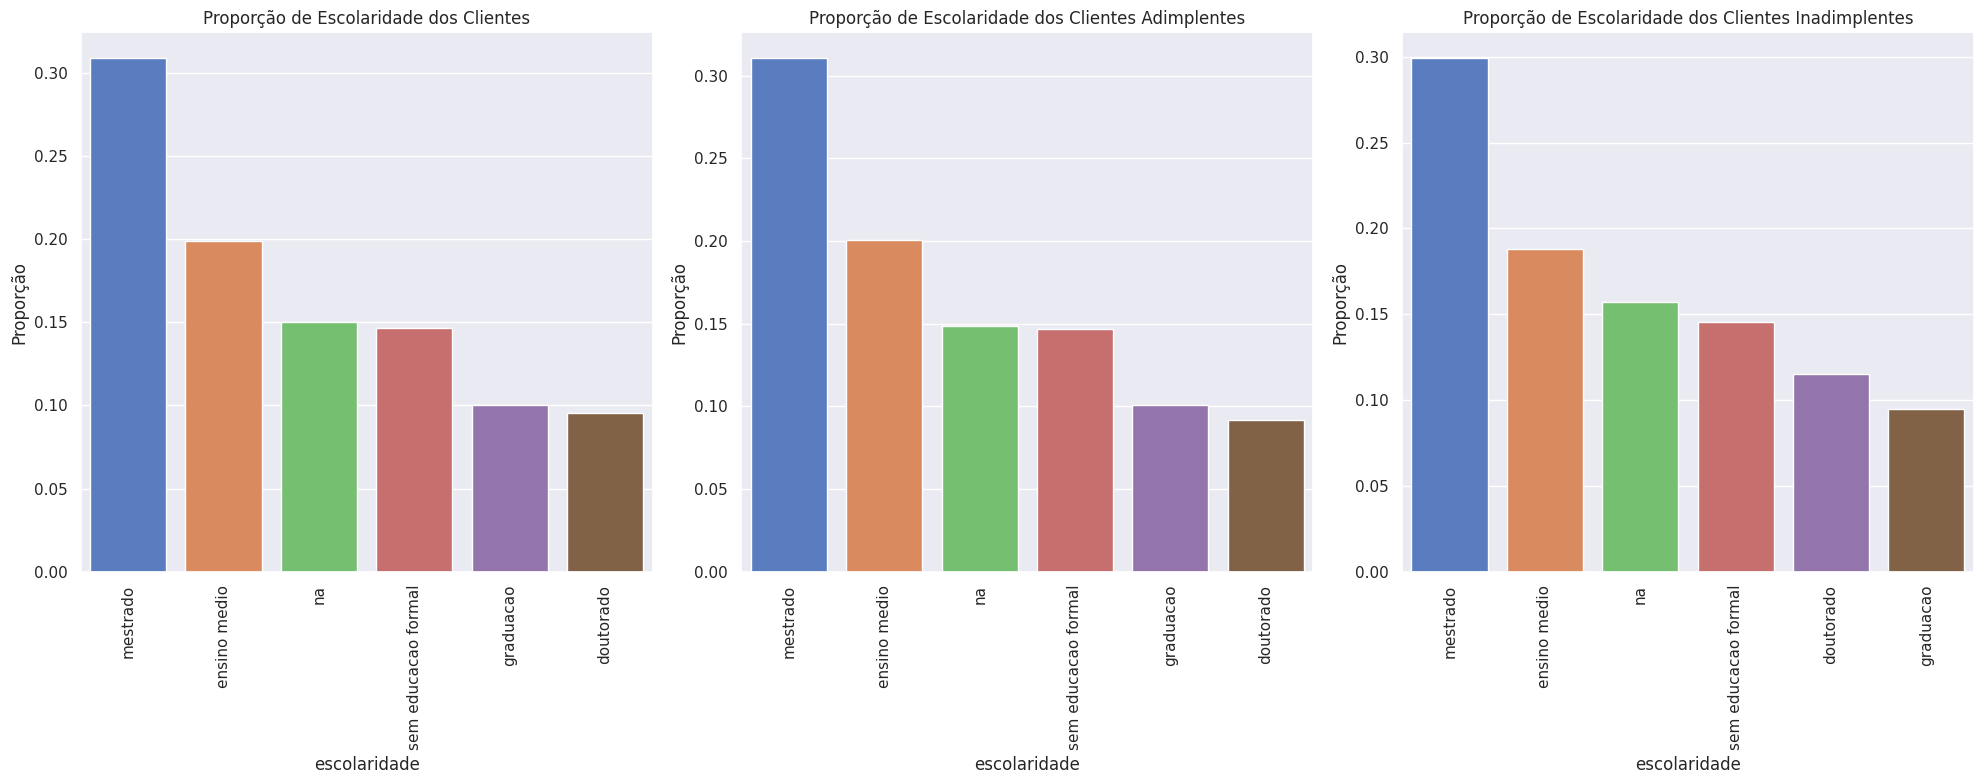

In [ ]:
plot_proporcao_variavel_cat('escolaridade')

<p align = 'justify'>Após a análise da proporção da variável <b><code>escolaridade</code></b> em relação ao <b>default</b>, observamos um padrão semelhante ao identificado na análise univariada. O **nível de escolaridade <b>"Mestrado"</b> apresenta a maior proporção em todas as categorias, indicando que clientes com esse grau de formação são predominantes na base de dados.
Além disso, a distribuição dos níveis de escolaridade entre clientes adimplentes e inadimplentes mantém um padrão semelhante, o que pode sugerir que <b>a escolaridade, por si só, não tem um impacto direto na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</b>  

---


- Grafico **`salario_anual por default`**

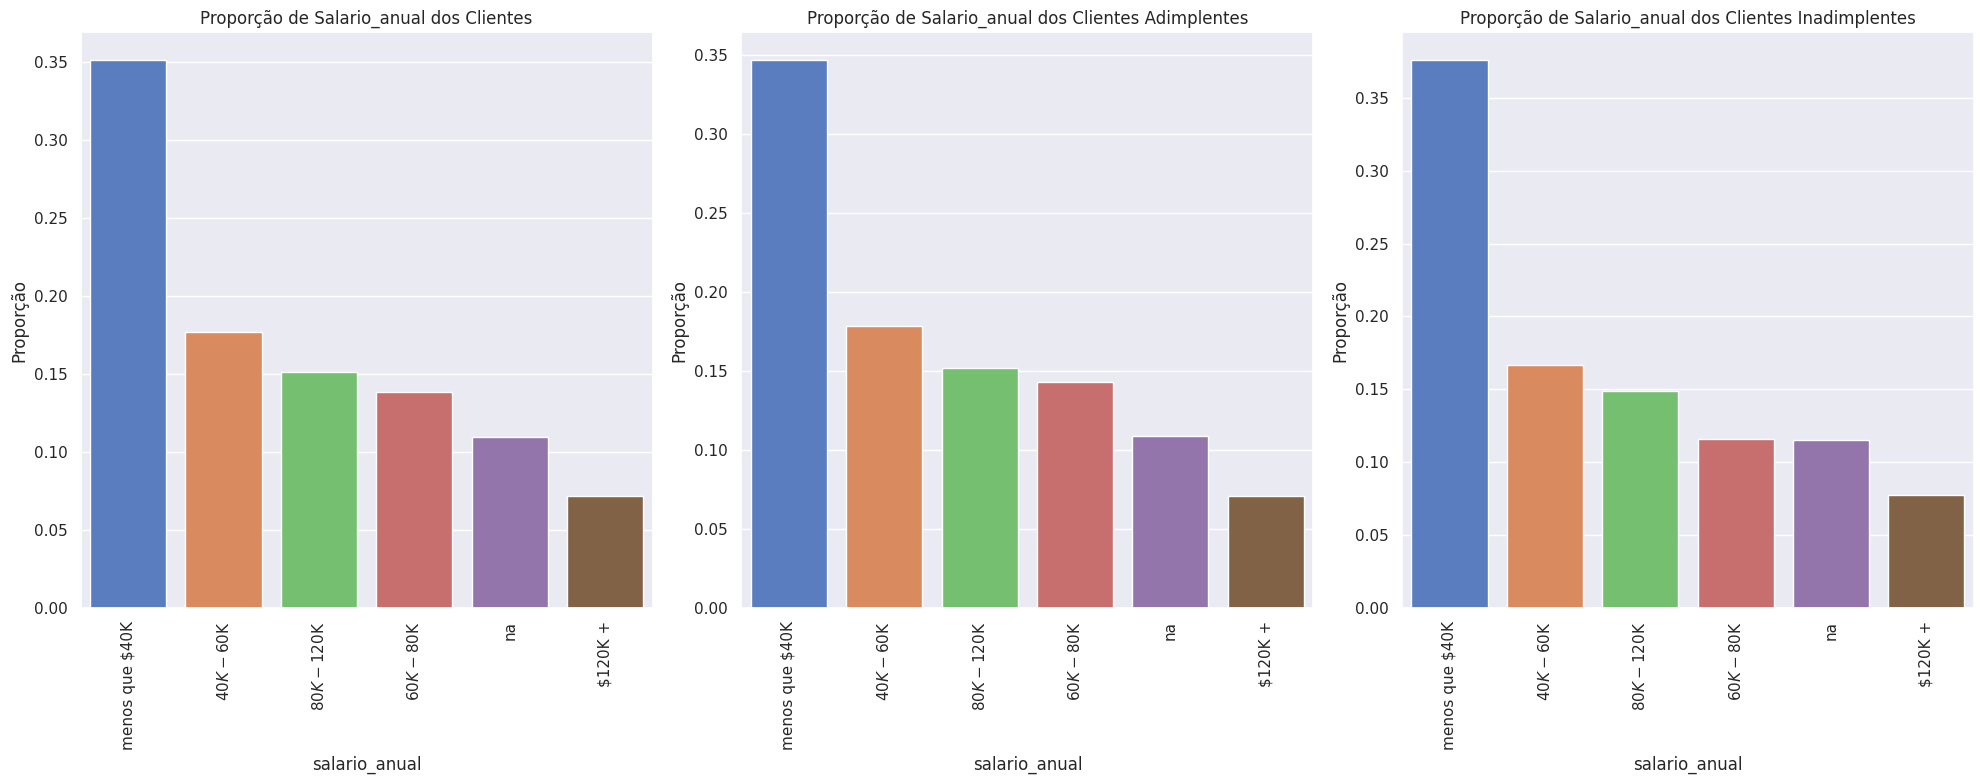

In [ ]:
plot_proporcao_variavel_cat('salario_anual')

<p align = 'justify'> Após a análise da proporção da variável <b><code>salario_anual</code></b> em relação ao <b>default</b>, observamos um padrão semelhante ao identificado na análise univariada. O <b>faixa salarial anual "menor que $40k"</b> apresenta a maior proporção em todas as categorias, indicando que clientes com essa faixa salarial são predominantes na base de dados.
Além disso, a distribuição das faixas salarial anual entre clientes adimplentes e inadimplentes mantém um padrão semelhante, o que pode sugerir que <b>o salário anual, por si só, não tem um impacto direto na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</p>  

---

- Grafico **`estado_civil por default`**

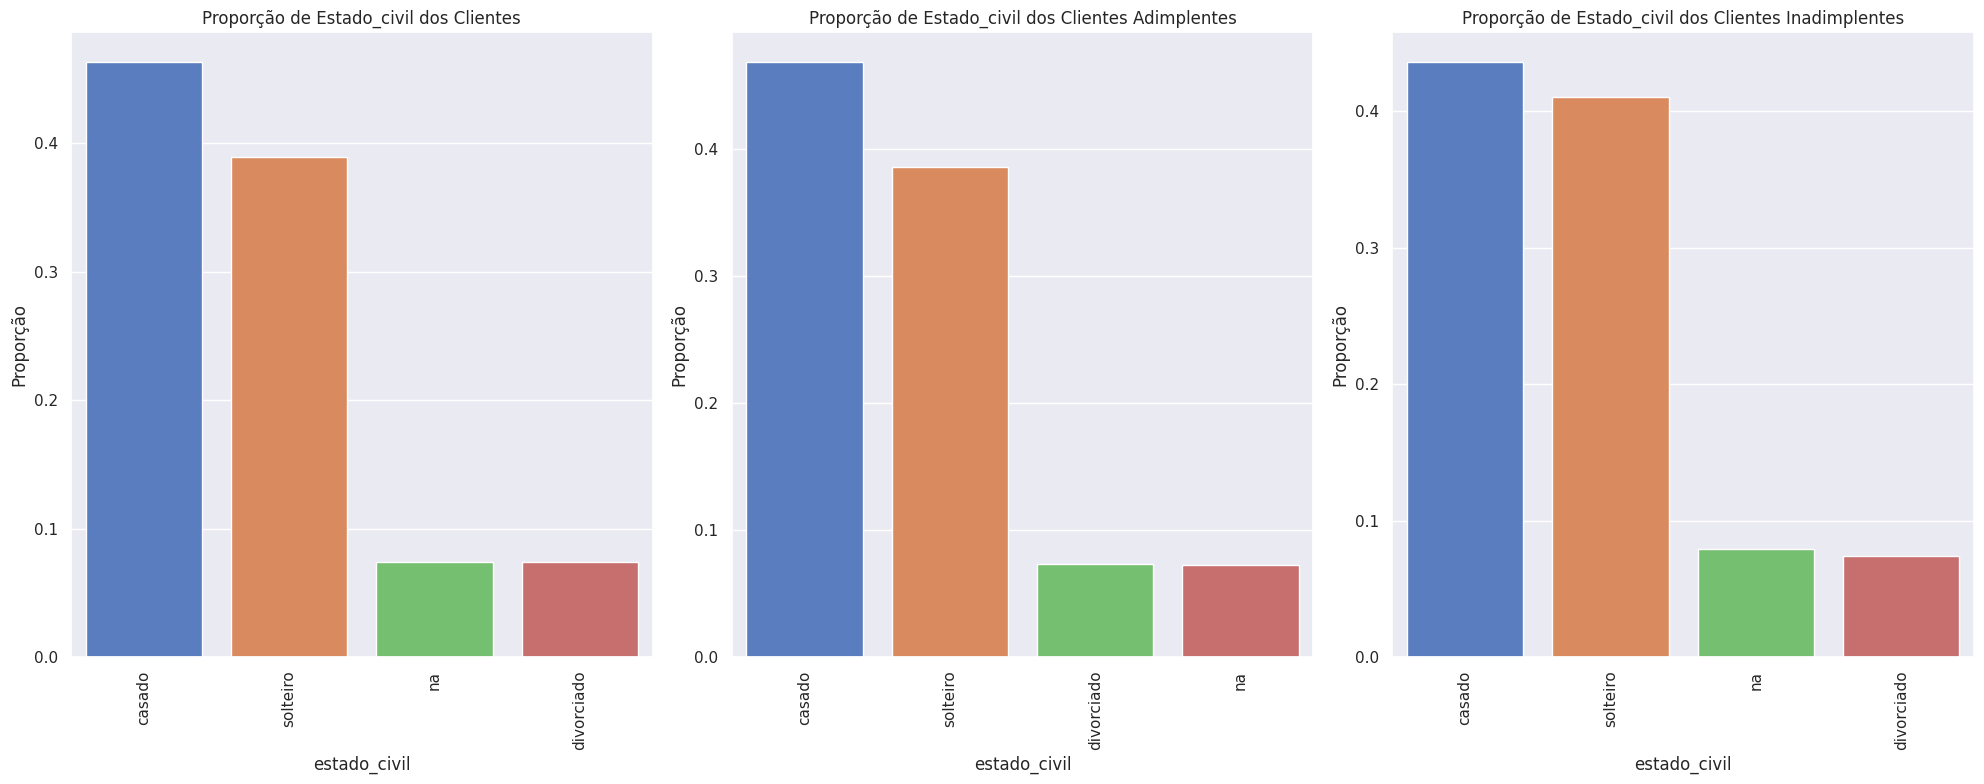

In [ ]:
plot_proporcao_variavel_cat('estado_civil');

<p align = 'justify'> Após a análise da proporção da variável <b><code>estado_civil</code></b> em relação ao <b>default</b>, observamos um padrão semelhante ao identificado na análise univariada. O <b>estado civil "Casado"</b> apresenta a maior proporção em todas as categorias, indicando que clientes casados são predominantes na base de dados.
Além disso, a distribuição dos estados civil entre clientes adimplentes e inadimplentes mantém um padrão semelhante, o que pode sugerir que <b>o estado civil, por si só, não tem um impacto direto na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</p>  

---

<p align = 'jstify'> </p>

- Grafico **`tipo_cartao por default`**

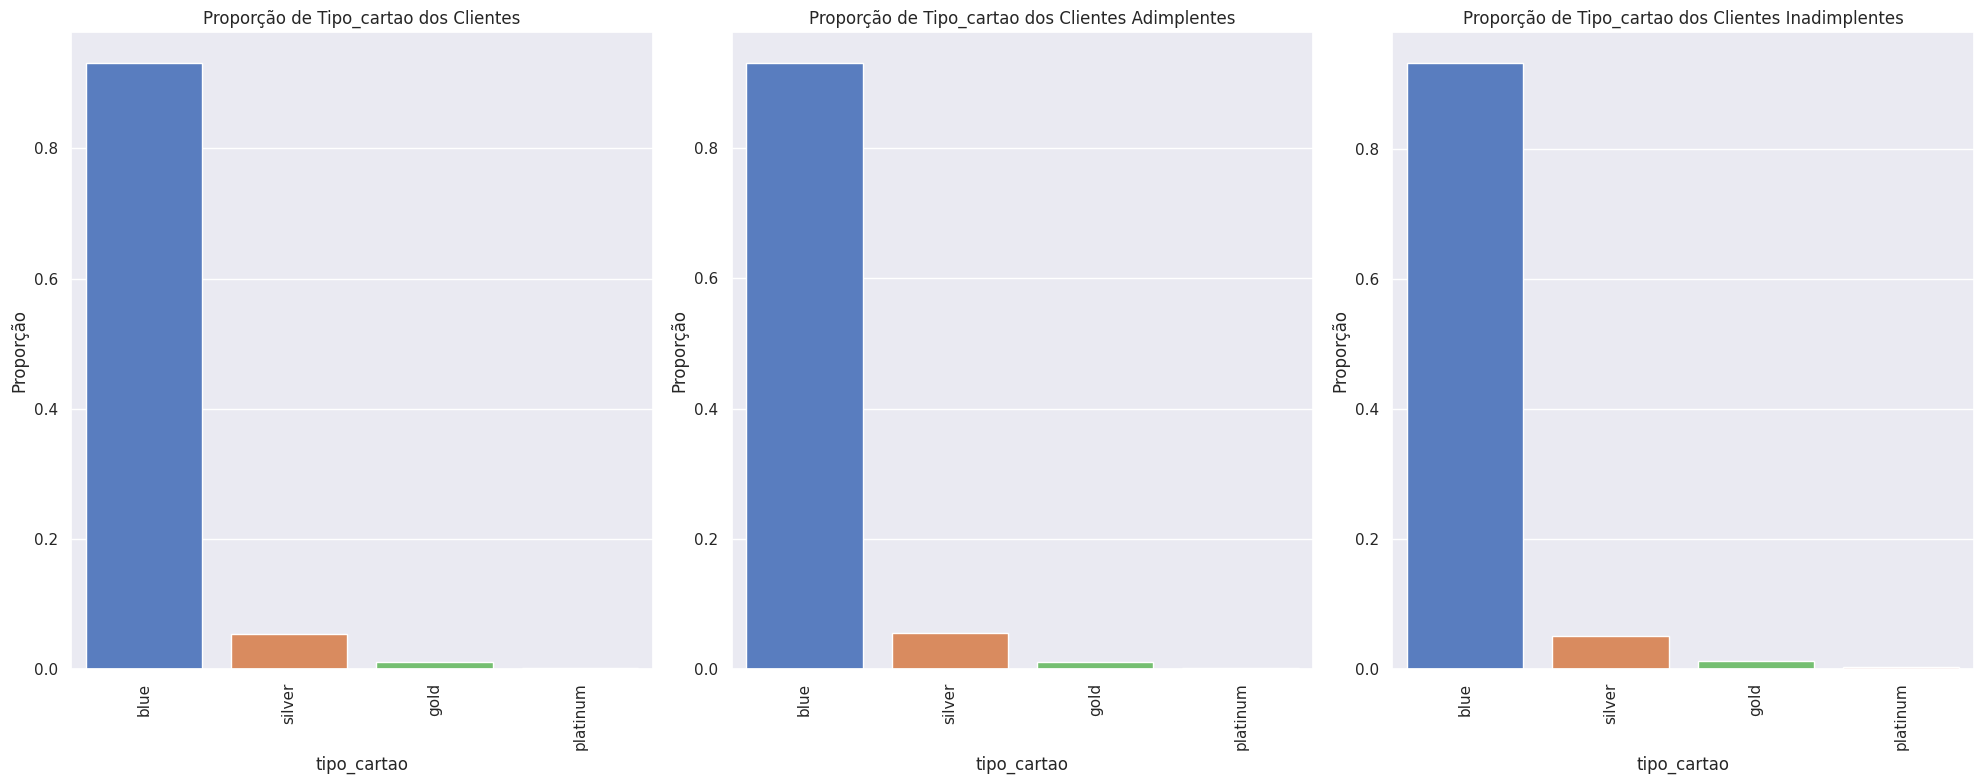

In [ ]:
plot_proporcao_variavel_cat('tipo_cartao')

<p align = 'justify'> Após a análise da proporção da variável <b><code>tipo_cartao</code></b> em relação ao <b>default</b>, observamos um padrão semelhante ao identificado na análise univariada. O <b>cartão do tipo "Blue"</b> apresenta a maior proporção em todas as categorias, indicando que clientes que possuem esse tipo de cartão são predominantes na base de dados.
Além disso, a distribuição dos tipos de cartão entre clientes adimplentes e inadimplentes mantém um padrão semelhante, o que pode sugerir que <b>o tipo de cartão, por si só, não tem um impacto direto na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</p>  

---

- Grafico **`sexo por default`**

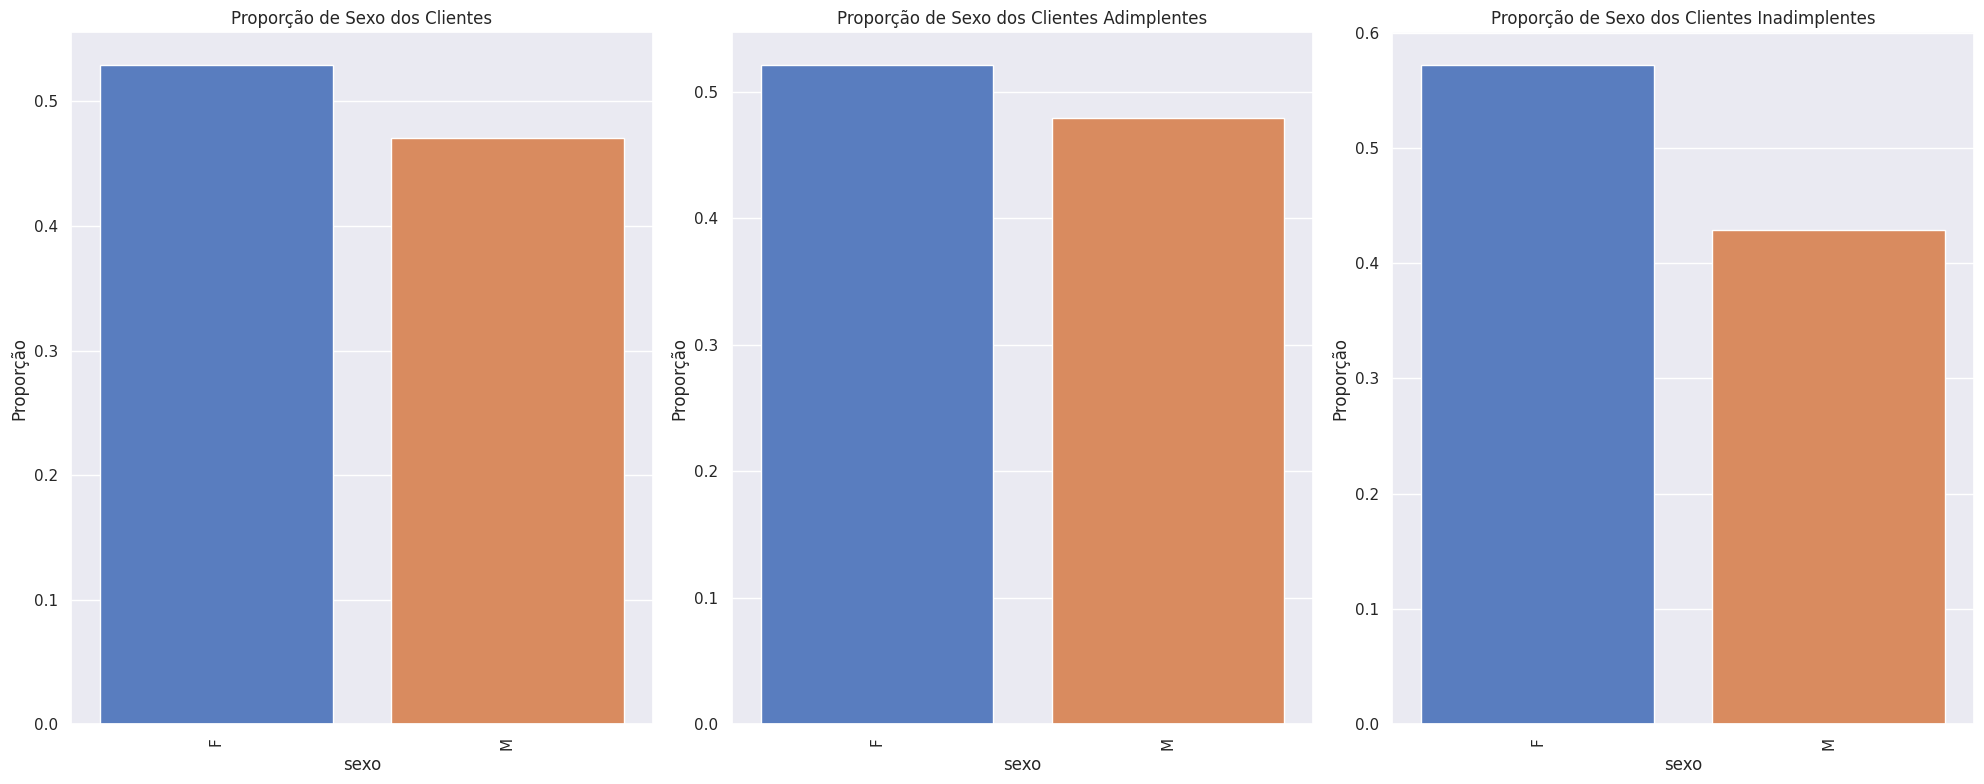

In [ ]:
plot_proporcao_variavel_cat('sexo')

<p align='justify'> A análise da variável <b><code>sexo</code></b> observamos que a categoria <b>F (Feminino)</b> tem uma proporção ligeiramente maior do que a categoria <b>M (Masculino)</b> em todas as três distribuições. Essa predominância do sexo feminino se mantém tanto para clientes <b>adimplentes</b> quanto para <b>inadimplentes</b>, sem grandes variações entre os grupos.  
A similaridade nas proporções entre os clientes adimplentes e inadimplentes sugere que <b>o sexo pode não ser um fator determinante na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</p>

----

## Visualizações Numéricas

- Criando a função para variávies numéricas

In [ ]:
def plot_histograma_variavel(variavel):
    """
    Função para plotar histogramas de uma variável numérica específica
    para clientes adimplentes e inadimplentes.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados dos clientes.
    variavel (str): Nome da variável numérica que será analisada.
    default_col (str): Nome da coluna que indica adimplência/inadimplência. Padrão é 'default'.
    """
    # Filtrando os dados dos clientes adimplentes e inadimplentes
    df_adimplente = df[df['default'] == 0]
    df_inadimplente = df[df['default'] == 1]

    # Títulos para os gráficos
    titulos = [
        f'Histograma de {variavel.capitalize()} dos Clientes',
        f'Histograma de {variavel.capitalize()} dos Clientes Adimplentes',
        f'Histograma de {variavel.capitalize()} dos Clientes Inadimplentes'
    ]

    # Criando o layout para os subgráficos (1 linha, 3 colunas)
    figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
    sns.set_theme(style='darkgrid')

    # Lista de DataFrames para iteração
    dataframes = [df, df_adimplente, df_inadimplente]

    # Gerando os gráficos para cada grupo
    for eixo, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):
        f = sns.histplot(x=variavel, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(title=titulo, xlabel=variavel.capitalize(), ylabel='Frequência Absoluta')

    # Melhorando o layout
    plt.tight_layout()
    plt.show()



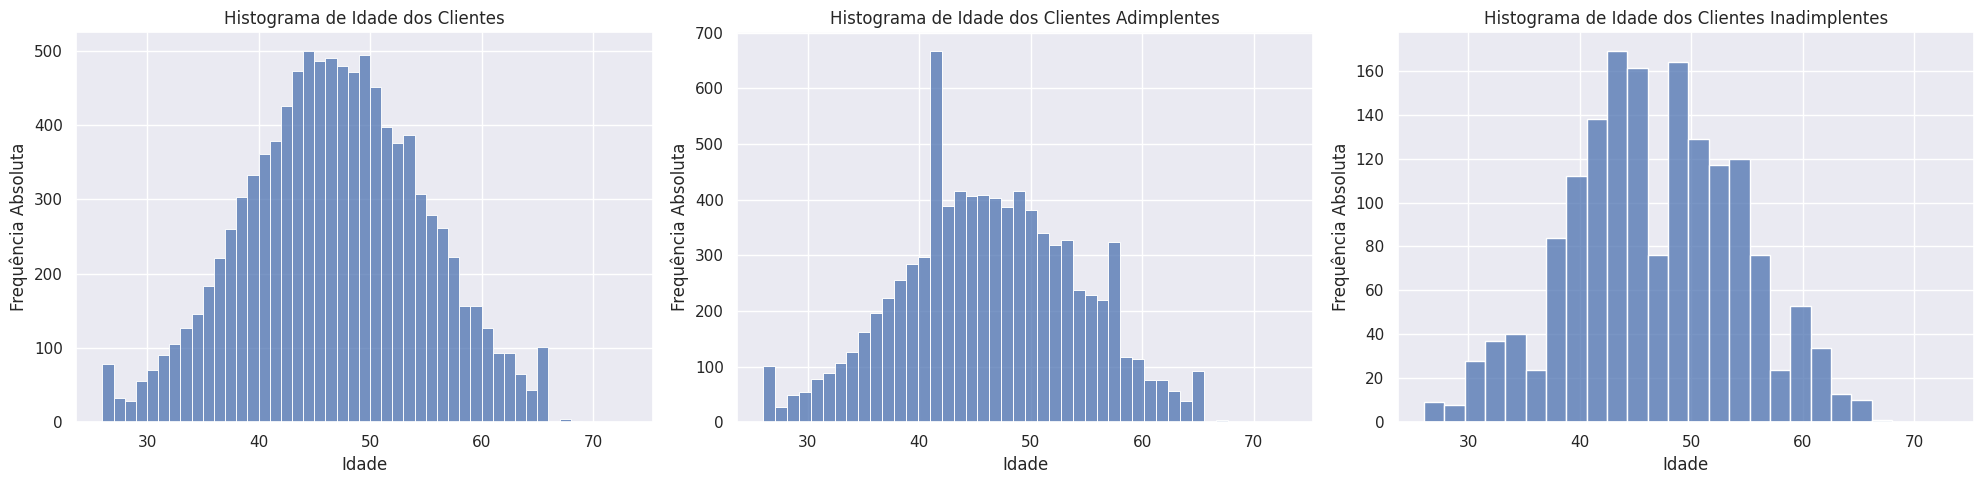

In [ ]:
plot_histograma_variavel('idade')

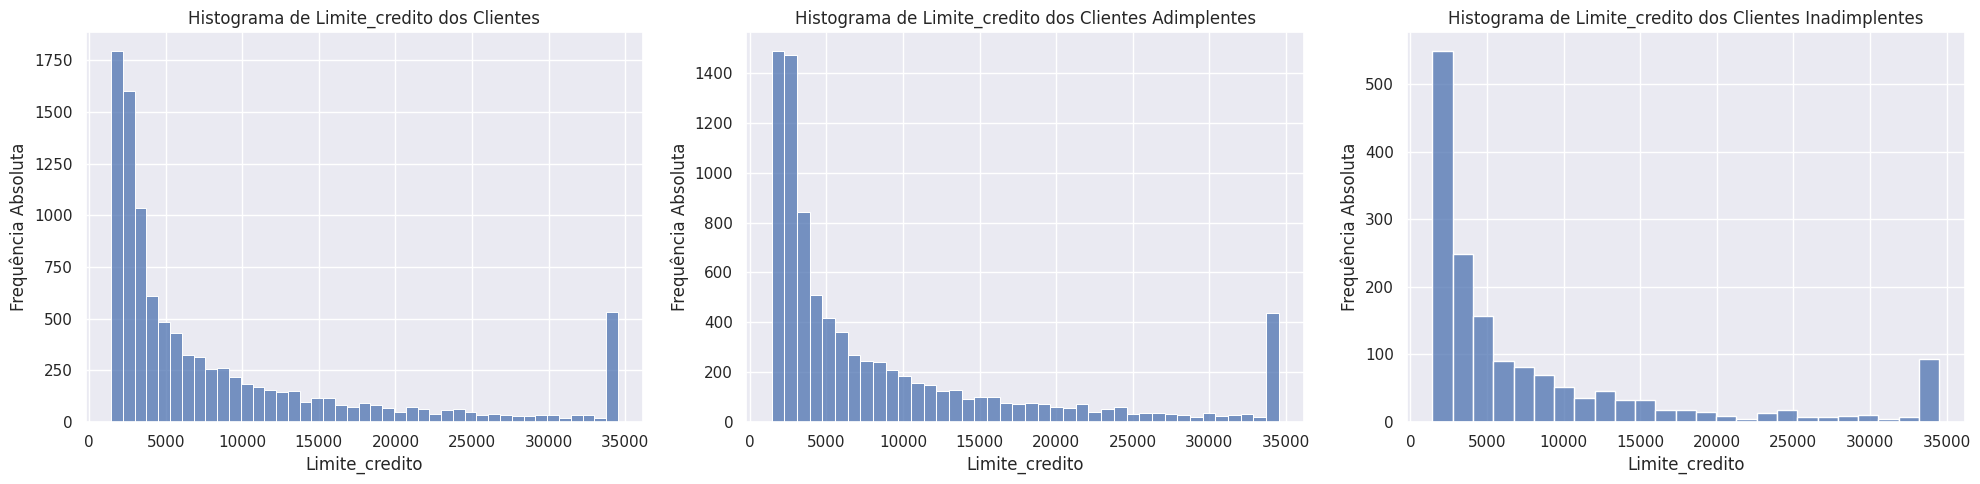

In [ ]:
plot_histograma_variavel('limite_credito')

<p align = 'justify'>  A análise da distribuição do <b><code>limite de crédito</b></code> tem um formato assimétrico à direita, ou seja, a maioria dos clientes possui limites menores, enquanto poucos possuem valores elevados.O mesmo padrão é observado tanto para clientes <b>adimplentes</b> quanto <b>inadimplentes</b>, indicando que o limite de crédito não difere drasticamente entre os grupos. Há um pico no limite máximo, possivelmente devido a um valor fixo oferecido a um grupo específico de clientes, porém parece ter um comportamento semelhante entre os grupos, sugerindo que pode não ser um fator isolado na inadimplência.  

----

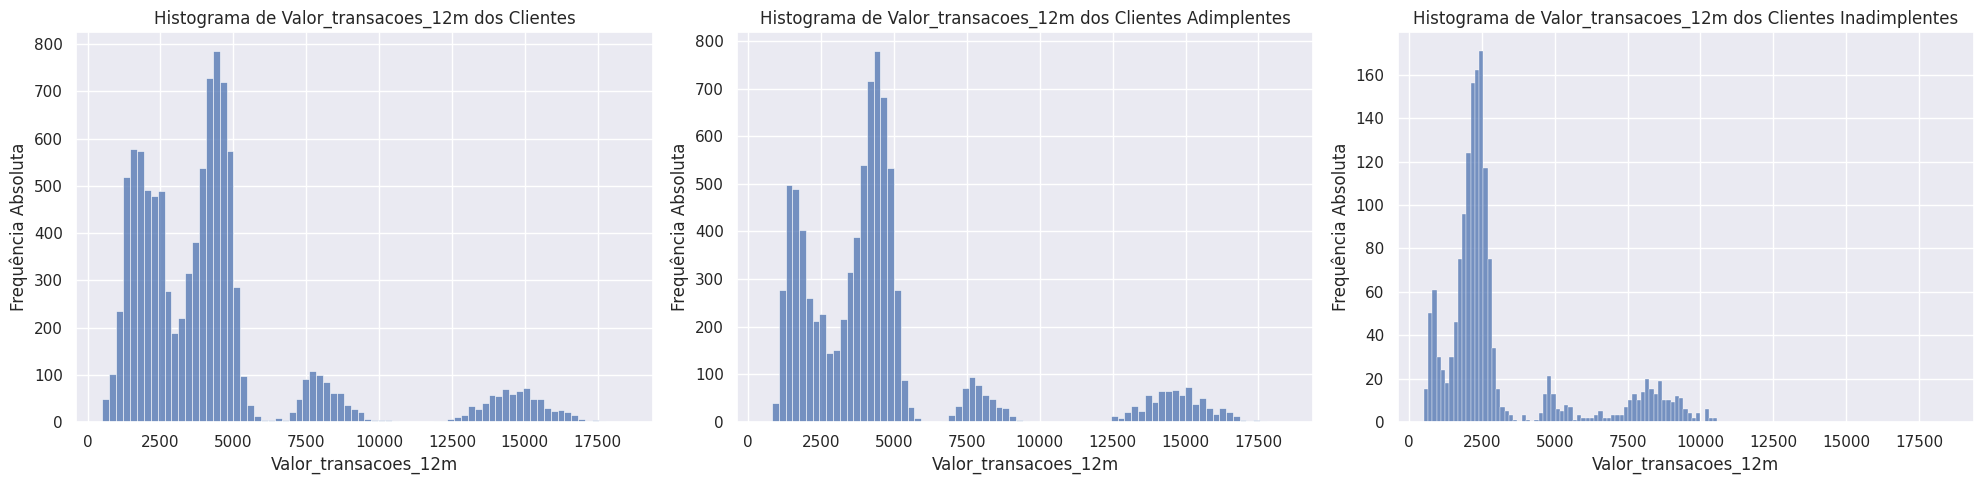

In [ ]:
plot_histograma_variavel('valor_transacoes_12m')

<p align =  'justify'>A distribuição do <b><code>valor das transações nos últimos 12 meses</code></b> apresenta múltiplos picos, sugerindo que os valores das transações seguem diferentes faixas de comportamento. Os clientes adimplentes e inadimplentes apresentam padrões semelhantes, mas os inadimplentes parecem ter uma frequência ligeiramente menor em valores mais altos. Isso pode indicar que clientes inadimplentes realizam menos transações ou transações de menor valor. O que pode indicar diferenças mais relevantes entre adimplentes e inadimplentes, podendo ser considerada uma importante variável para um modelo de classificação.</p>

---

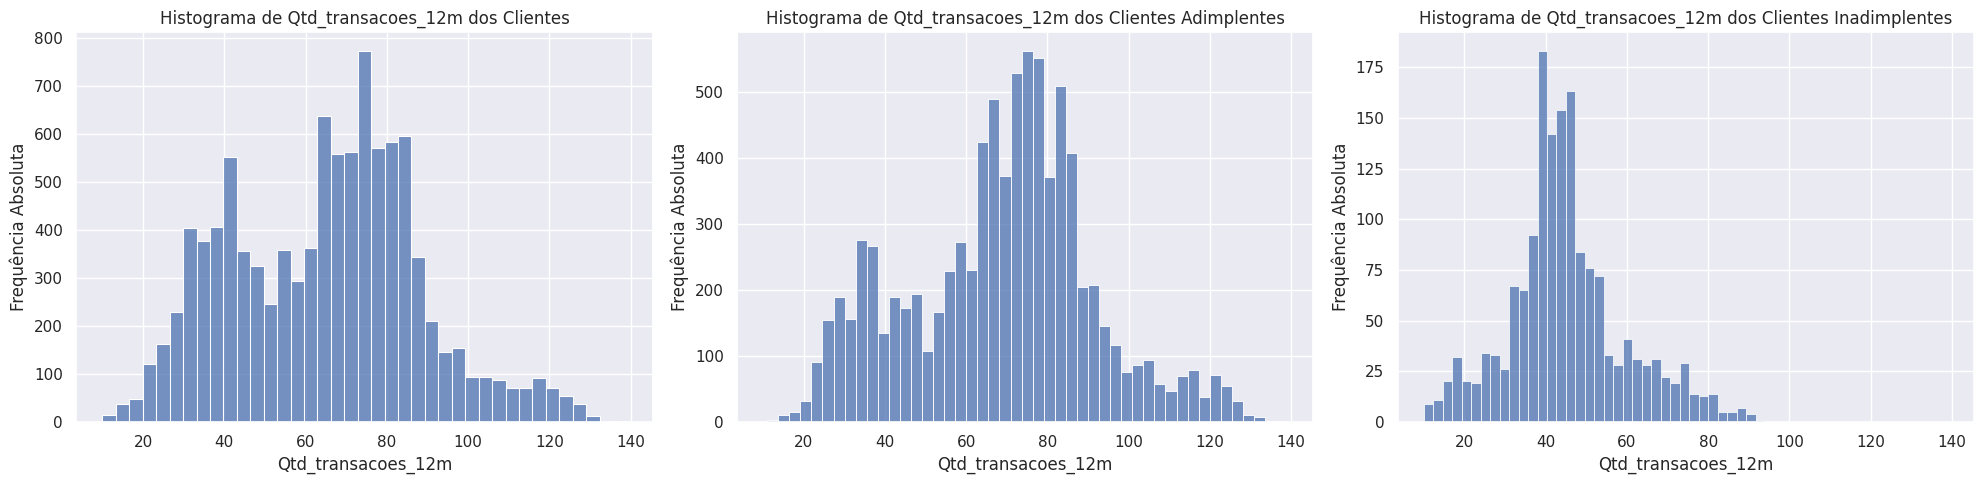

In [ ]:
plot_histograma_variavel('qtd_transacoes_12m')

<p align = 'justify'> Assim como no valor das transações, a <b><code>quantidade de transações realizadas nos últimos 12 meses</code></b> apresenta múltiplos picos, sugerindo grupos distintos de clientes. Clientes inadimplentes tendem a ter uma distribuição um pouco mais concentrada em valores menores, enquanto os adimplentes estão mais dispersos. O que pode indicar diferenças mais relevantes entre adimplentes e inadimplentes, podendo ser considerada uma variável importante para o modelo de classificação.</p>

---

- Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

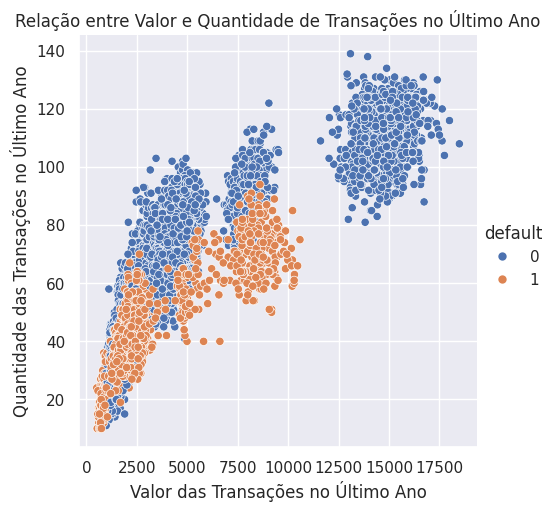

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', #coluna pro eixo X
                y='qtd_transacoes_12m',   #coluna pro eixo Y
                data=df,                  #dataframe
                hue='default')            #variavel categórica que diferencia por cor

#Ajusta os titulos
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

O gráfico que relaciona o **Valor das Transações nos Últimos 12 Meses** com a **Quantidade de Transações nos Últimos 12 Meses** mostra que clientes **adimplentes** tendem a realizar transações de menor valor e em menor quantidade quando comparados aos **inadimplentes**.

Observamos que:
- O número de transações anuais varia entre **20 e 80** para os **adimplentes** e entre **20 e 140** para os **inadimplentes**.
- O valor total das transações nos últimos 12 meses situa-se entre **2.500 e 10.000** para os **adimplentes**, enquanto para os **inadimplentes** varia de **2.500 a 17.500**.

Essas diferenças sugerem que essas variáveis podem desempenhar um papel importante no modelo de classificação de risco de crédito.

----

<p align='justify'>A análise do conjunto de dados revelou que as variáveis <b>tipo_cartão</b>, <b>salário_anual</b> e <b>escolaridade</b> não apresentaram relevância para determinar a inadimplência de um cliente. Por outro lado, as variáveis <b>quantidade de transações nos últimos 12 meses</b> e <b>limite de crédito</b> mostraram-se eficazes, indicando que clientes com maior quantidade de transações anuais — entre <b>2.500 e 5.000</b> — e limites de crédito mais elevados demonstraram maior capacidade de honrar seus compromissos, ou seja, são predominantemente <b>adimplentes</b>.</p>
